In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('/content/mushrooms (1).csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
df['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [9]:
df['cap-surface'].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [10]:
df['cap-color'].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [11]:
df['bruises'].unique()

array(['t', 'f'], dtype=object)

In [12]:
df['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [13]:
df['gill-attachment'].unique()

array(['f', 'a'], dtype=object)

In [14]:
df['gill-spacing'].unique()

array(['c', 'w'], dtype=object)

In [15]:
df['gill-size'].unique()

array(['n', 'b'], dtype=object)

In [16]:
df['gill-color'].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [17]:
df['stalk-shape'].unique()

array(['e', 't'], dtype=object)

In [18]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [19]:
df['stalk-surface-above-ring'].unique()

array(['s', 'f', 'k', 'y'], dtype=object)

In [20]:
df['stalk-surface-below-ring'].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

In [21]:
df['stalk-color-above-ring'].unique()

array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object)

In [22]:
df['stalk-color-below-ring'].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

In [23]:
df['veil-type'].unique()

array(['p'], dtype=object)

In [24]:
df['veil-color'].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

In [25]:
df['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

In [26]:
df['ring-type'].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

In [27]:
df['spore-print-color'].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

In [28]:
df['population'].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

In [29]:
df['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

# Categorical Input to Numeric Values

In [30]:
categories_list=[['x', 'b', 's', 'f', 'k', 'c'],
           ['s', 'y', 'f', 'g'],
           ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
           ['t', 'f'],
           ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
            ['f', 'a'],
               ['c', 'w'],
            ['n', 'b'],
              ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
             ['e', 't'],
                ['e', 'c', 'b', 'r', '?'],
                 ['s', 'f', 'k', 'y'],
                  ['s', 'f', 'y', 'k'],
                     ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
                      ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
                 ['p'],
                   ['w', 'n', 'o', 'y'],
                  ['o', 't', 'n'],
                 ['p', 'e', 'l', 'f', 'n'],
                ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
                  ['s', 'n', 'a', 'v', 'y', 'c'],
                 ['u', 'g', 'm', 'd', 'p', 'w', 'l']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [31]:
df_1 = df.copy()

In [33]:
df_1[['cap-shape',
             'cap-surface',
              'cap-color','bruises',
              'odor','gill-attachment','gill-spacing','gill-size',
      'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
      'stalk-surface-below-ring','stalk-color-above-ring',
      'stalk-color-below-ring','veil-type','veil-color','ring-number',
      'ring-type','spore-print-color','population','habitat']] = enc.fit_transform(df_1[['cap-shape',
             'cap-surface',
              'cap-color','bruises',
              'odor','gill-attachment','gill-spacing','gill-size',
      'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
      'stalk-surface-below-ring','stalk-color-above-ring',
      'stalk-color-below-ring','veil-type','veil-color','ring-number',
      'ring-type','spore-print-color','population','habitat']])

In [34]:
df_1.dtypes

class                        object
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

# Categorical Output to Numeric values

In [35]:
le = LabelEncoder()

In [36]:
df_1['class'] = le.fit_transform(df_1['class'])

In [45]:
df_1.dtypes

class                         int64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
population                  float64
habitat                     float64
dtype: object

In [63]:
df_1 = df_1.drop('gill-spacing',axis=1)

In [64]:
df_1.dtypes

class                         int64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
population                  float64
habitat                     float64
dtype: object

<Axes: >

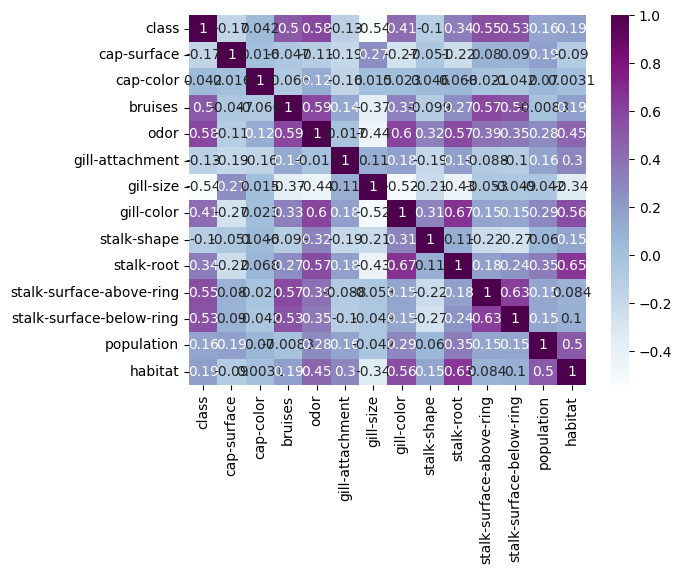

In [65]:
# Calculate the correlation matrix
corr = df_1.corr()

# Plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

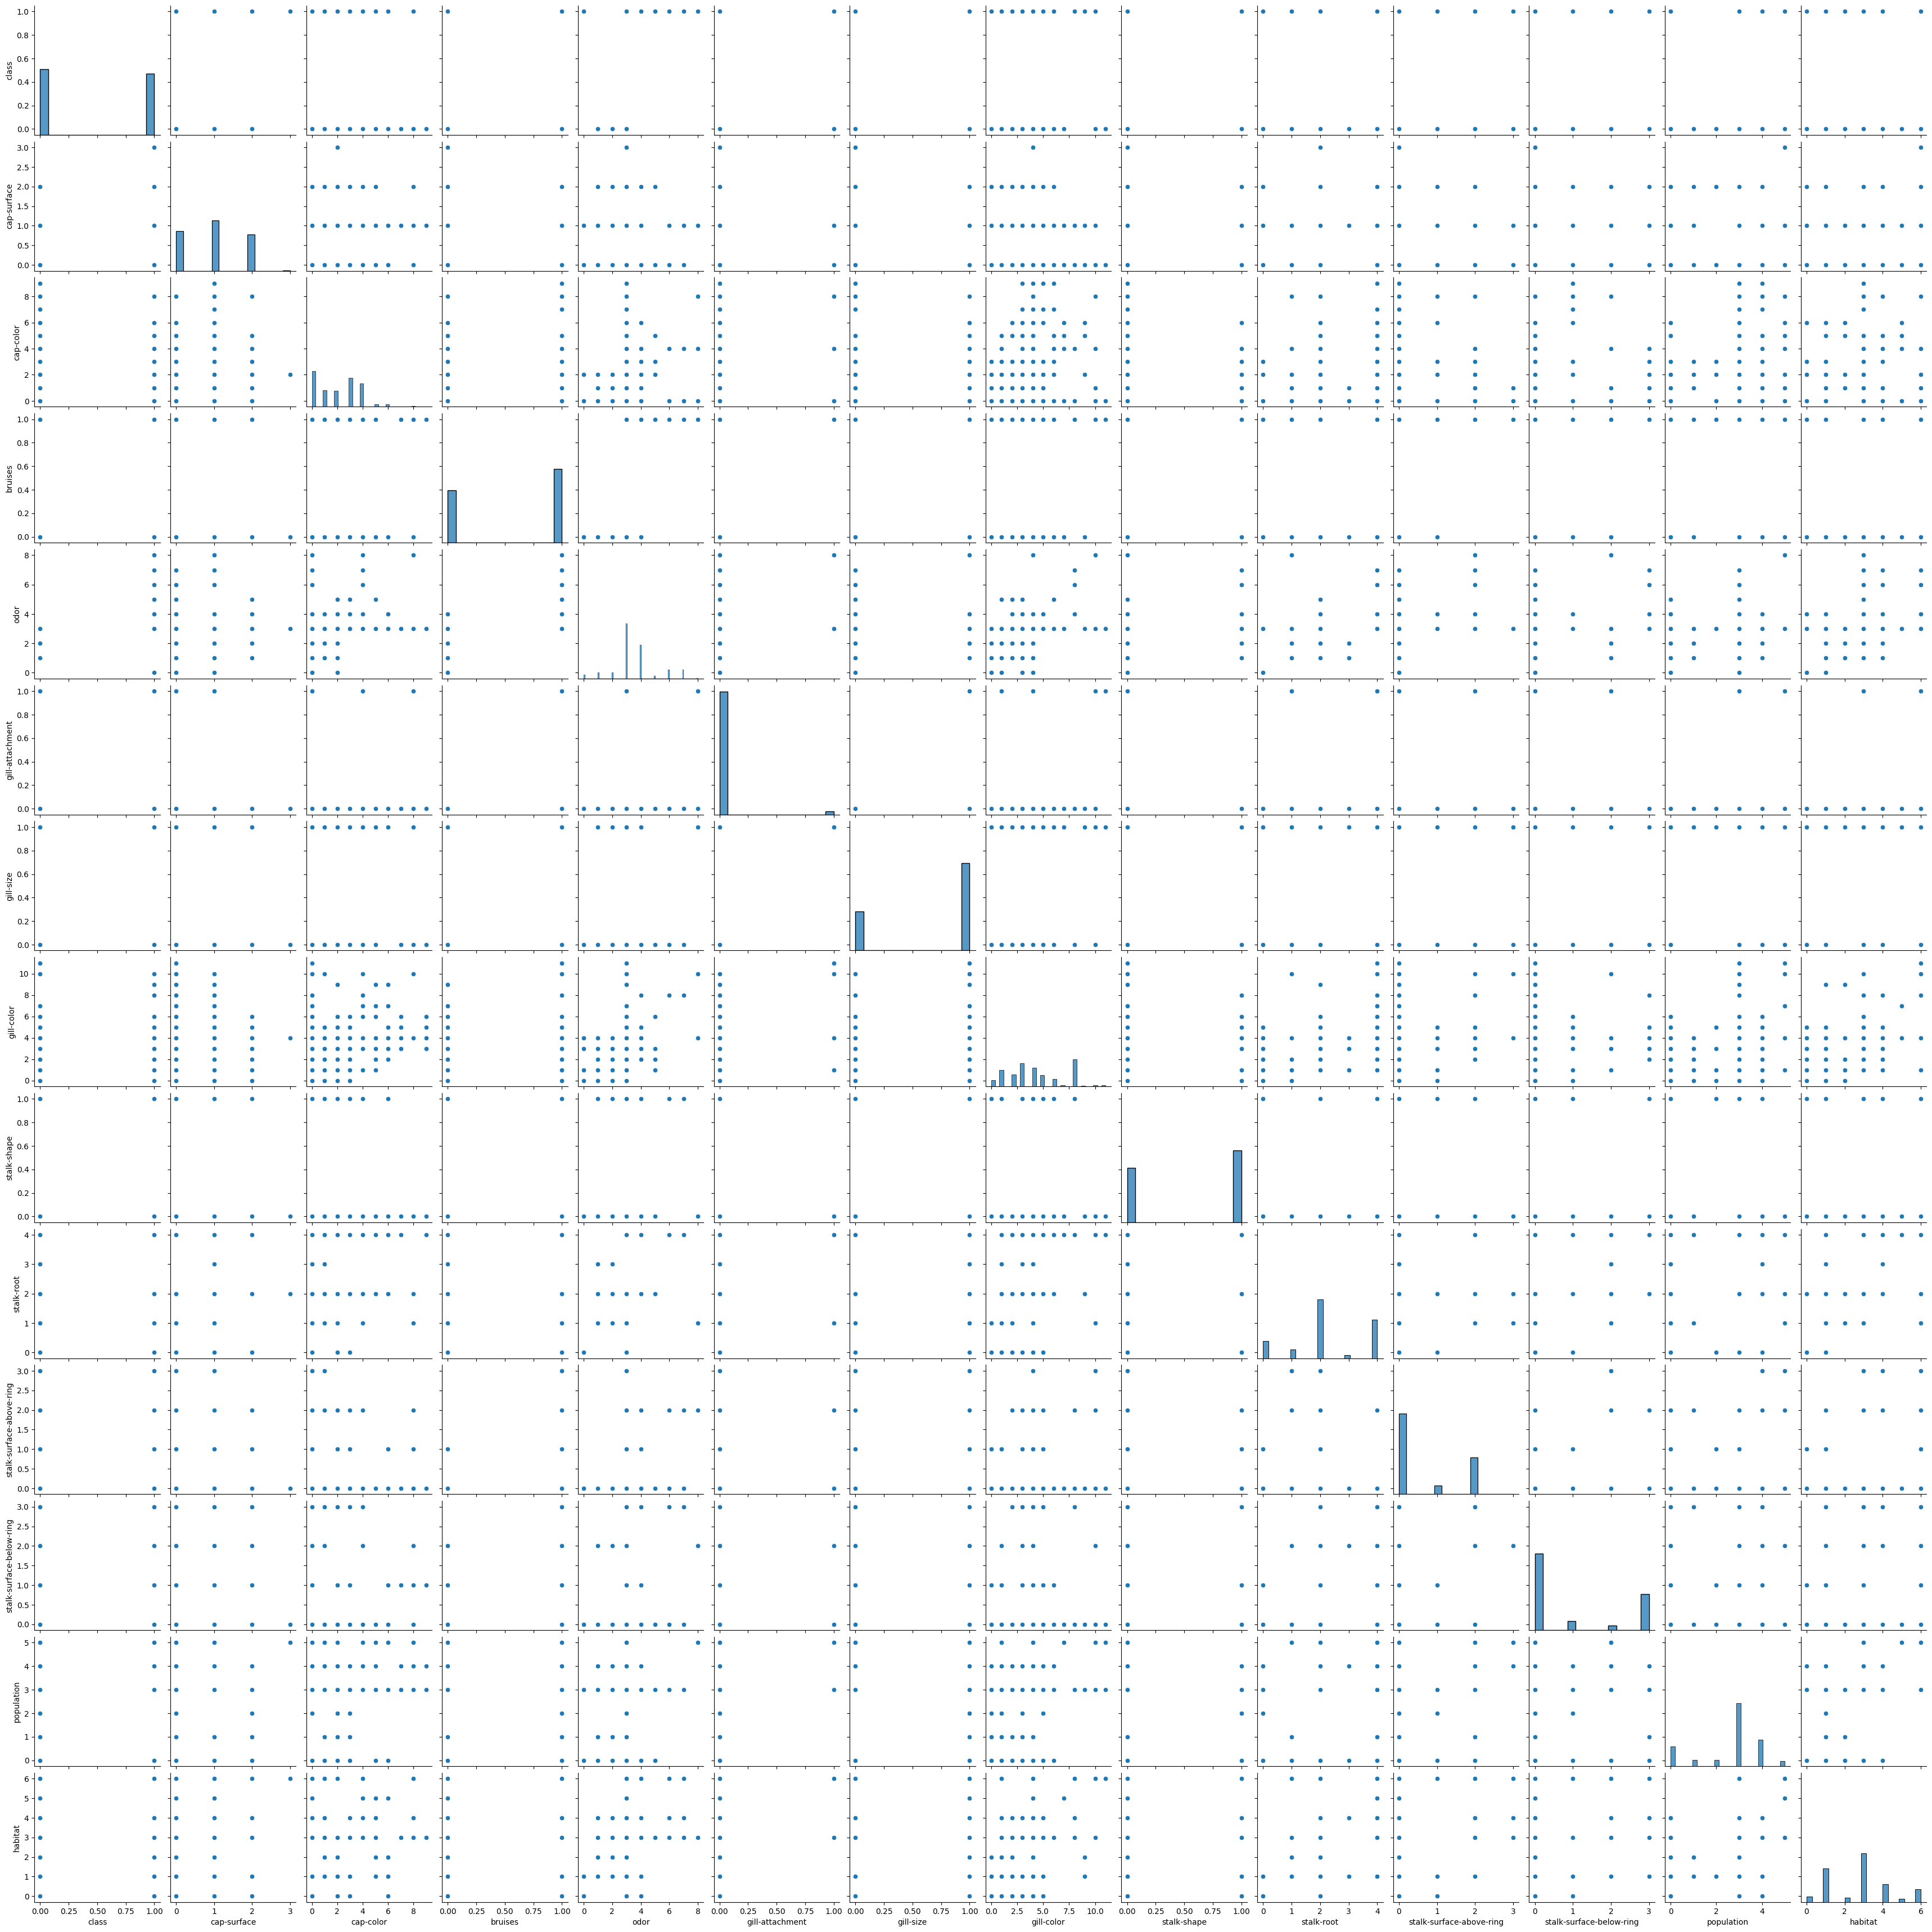

In [66]:
sns.pairplot(df_1)

<ipython-input-69-669115f19b39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['habitat'])


<Axes: xlabel='habitat', ylabel='Density'>

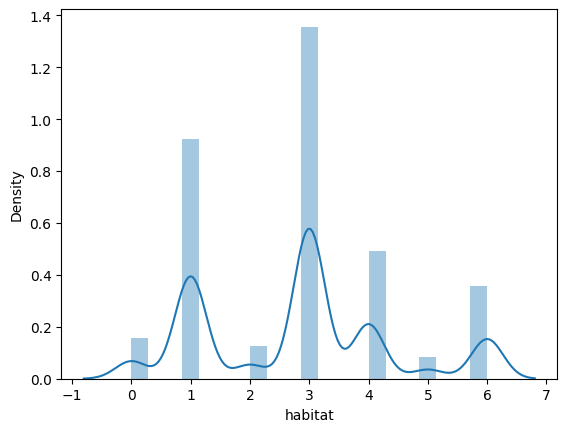

In [69]:
sns.distplot(df_1['habitat'])

<Axes: ylabel='count'>

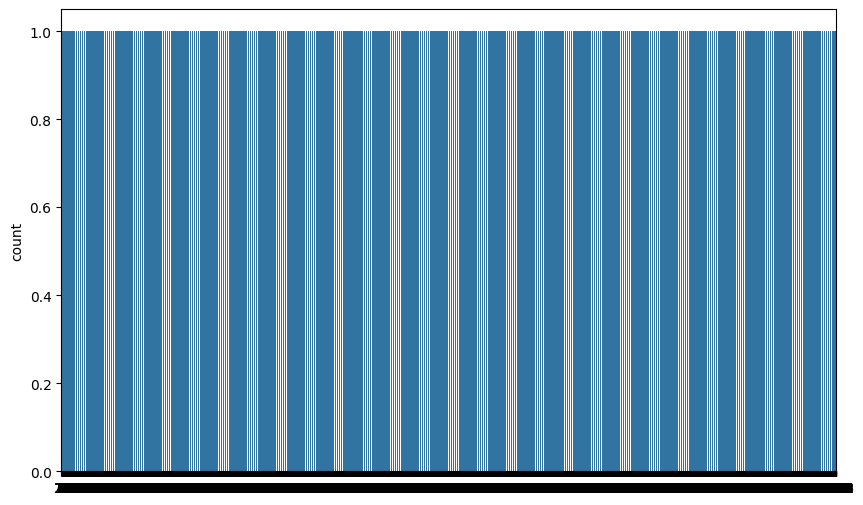

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(df_1['population'])

<Axes: xlabel='habitat', ylabel='population'>

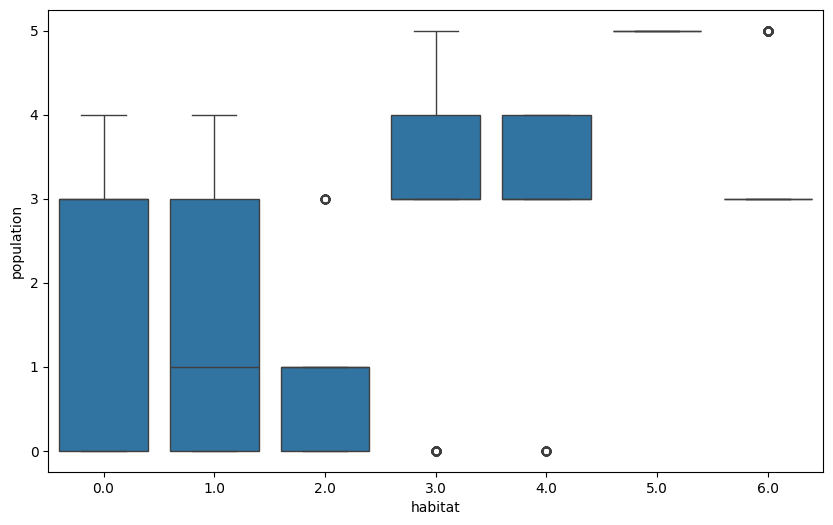

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(x='habitat',y='population',data=df_1)

<Axes: xlabel='population', ylabel='gill-attachment'>

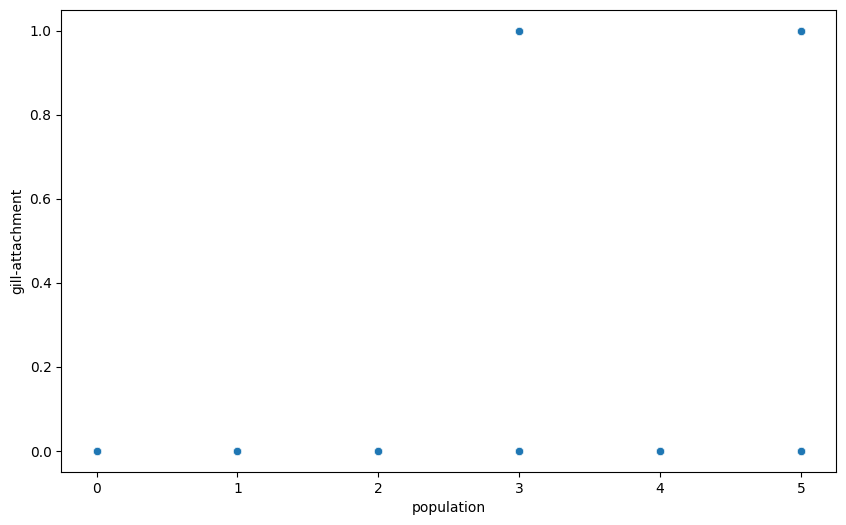

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='population',y='gill-attachment',data=df_1)

<Axes: xlabel='population', ylabel='odor'>

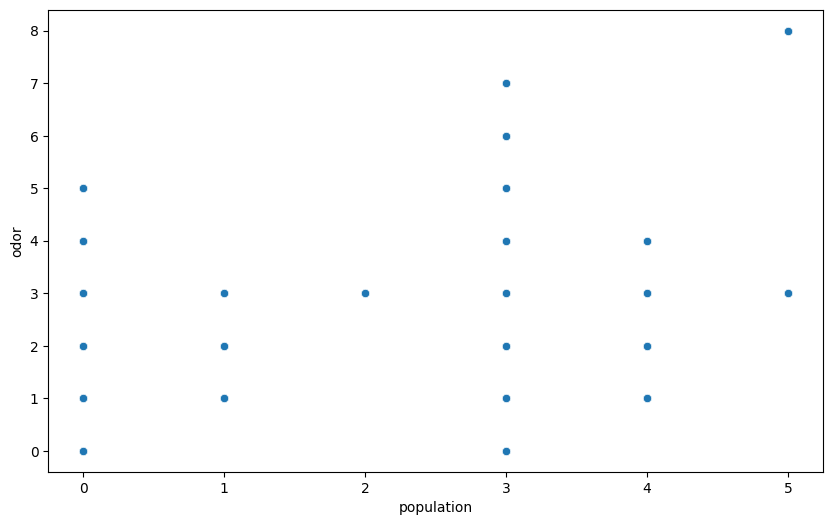

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='population',y='odor',data=df_1)

In [76]:
df_1.describe()

,class,cap-surface,cap-color,bruises,odor,gill-attachment,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.971935,2.093550,0.584441,3.589365,0.025849,0.690793,4.274249,0.567208,2.290005,0.660758,0.994584,2.687839,2.794682
std,0.499708,0.775534,1.744794,0.492848,1.557709,0.158695,0.462195,2.669652,0.495493,1.334434,0.908808,1.333097,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000
50%,0.000000,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000
75%,1.000000,2.000000,3.000000,1.000000,4.000000,0.000000,1.000000,6.000000,1.000000,4.000000,2.000000,3.000000,4.000000,4.000000
max,1.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,5.000000,6.000000


In [77]:
df_1['class'].unique()

array([1, 0])

In [79]:
X=df_1[['cap-surface','cap-color','bruises','odor','gill-attachment','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','population','habitat']].values

In [80]:
y1 = df_1[['class']].values

In [81]:
one_hot_enc = OneHotEncoder()

In [82]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [83]:
y1.shape

(8124, 1)

In [84]:
y = one_hot_enc.transform(y1).toarray()

In [85]:
y.shape

(8124, 2)

In [86]:
y1[0]

array([1])

In [87]:
y[0]

array([0., 1.])

In [88]:
X.shape

(8124, 13)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [90]:
X_train[0]

array([0., 2., 1., 3., 0., 1., 4., 0., 4., 0., 0., 0., 1.])

In [91]:
X_train.shape

(5443, 13)

In [92]:
scaler_age = MinMaxScaler()

In [93]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [94]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [95]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

# Tensorflow Model creation

In [100]:
Ai_brain = Sequential([
    # Hidden ReLU layers
                       Dense(units=5, activation='relu',input_shape=[13]),
                       Dense(units=3, activation='relu'),
    # Linear Output layer
                       Dense(units=2, activation="softmax")
                      ])

In [101]:
Ai_brain.compile(optimizer='adam',
                 loss= 'categorical_crossentropy',
                 metrics=['accuracy'])

In [102]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [103]:
Ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs= 2000,
             batch_size= 256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
22/22 [==============================] - 2s 23ms/step - loss: 0.9295 - accuracy: 0.5159 - val_loss: 0.7214 - val_accuracy: 0.5919
Epoch 2/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.5894 - val_loss: 0.5769 - val_accuracy: 0.6789
Epoch 3/2000
22/22 [==============================] - 0s 6ms/step - loss: 0.5591 - accuracy: 0.7285 - val_loss: 0.5071 - val_accuracy: 0.7870
Epoch 4/2000
22/22 [==============================] - 0s 7ms/step - loss: 0.4818 - accuracy: 0.8073 - val_loss: 0.4357 - val_accuracy: 0.8553
Epoch 5/2000
22/22 [==============================] - 0s 8ms/step - loss: 0.4192 - accuracy: 0.8694 - val_loss: 0.3888 - val_accuracy: 0.8818
Epoch 6/2000
22/22 [==============================] - 0s 8ms/step - loss: 0.3769 - accuracy: 0.8789 - val_loss: 0.3553 - val_accuracy: 0.8836
Epoch 7/2000
22/22 [==============================] - 0s 8ms/step - loss: 0.3452 - accuracy: 0.8844 - val_loss: 0.3280 - val_accuracy: 0.8855
Epoch

In [104]:
metrics = pd.DataFrame(Ai_brain.history.history)

In [105]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.929524,0.515892,0.721447,0.591943
1,0.672933,0.589381,0.576932,0.678851
2,0.559117,0.728459,0.507061,0.787020
3,0.481753,0.807275,0.435697,0.855278
4,0.419180,0.869374,0.388833,0.881761


<Axes: >

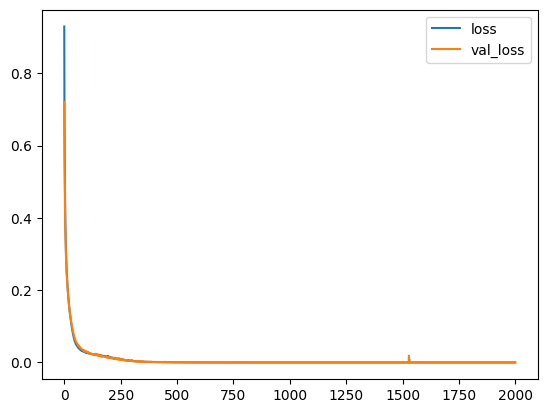

In [106]:
metrics[['loss','val_loss']].plot()

In [107]:
x_test_predictions = np.argmax(Ai_brain.predict(X_test_scaled), axis=1)

84/84 [==============================] - 0s 1ms/step


In [108]:
x_test_predictions.shape

(2681,)

In [109]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [110]:
y_test_truevalue.shape

(2681,)

In [111]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[1321    0]
 [   0 1360]]


In [112]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1321
           1       1.00      1.00      1.00      1360

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [113]:
# Saving the Model
Ai_brain.save('mushroom_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
# Saving the data
with open('mushroom_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,df_1,scaler_age,enc,one_hot_enc,le], fh)

In [116]:
# Loading the Model
ai_brain = load_model('mushroom_classification_model.h5')

In [118]:
# Loading the data
with open('mushroom_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,df_1,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

# **Prediction for a Single input**

In [125]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 19ms/step


In [126]:
print(x_single_prediction)

[0]


In [127]:
print(le.inverse_transform(x_single_prediction))

['e']
